<font size="4">

## Dataset: Saratoga Houses

El dataset **SaratogaHouses** contiene información sobre viviendas en el condado de Saratoga, Nueva York. Cada fila representa una casa y las columnas describen diversas características relacionadas con la propiedad, como el tamaño de la vivienda (`livingArea`), el número de dormitorios y baños, la presencia de garaje o chimenea, el año de construcción, el tamaño del terreno (`landValue`), entre otros. La variable objetivo suele ser el **precio de venta** de la casa (`price`), lo que lo convierte en un dataset ideal para problemas de regresión en ciencia de datos e inteligencia artificial. Aunque algunas variables son numéricas, otras se comportan como categóricas, lo que permite explorar técnicas de tratamiento mixto y evaluación de modelos predictivos.

El dataset consta de 15 variables, a las cuales les acompaña la columna precio, que es la variable objetivo. A continuación, veremos que significa cada una de las variables de la matriz de características del dataset:

- price: precio de la vivienda.
- lotSize: metros cuadrados de la vivienda.
- age: antigüedad de la vivienda.
- landValue: valor del terreno.
- livingArea: metros cuadrados habitables.
- pctCollege: porcentaje del vecindario con título universitario.
- bedrooms: número de dormitorios.
- firplaces: número de chimeneas.
- bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
- rooms: número de habitaciones.
- heating: tipo de calefacción.
- fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).
- sewer: tipo de desagüe.
- waterfront: si la vivienda tiene vistas al lago.
- newConstruction: si la vivienda es de nueva construcción.
- centralAir: si la vivienda tiene aire acondicionado.

link de descarga: https://www.kaggle.com/datasets/carloscinelli/saratoga

In [626]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from keras.src.backend import one_hot
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

warnings.filterwarnings('ignore')

In [627]:
# lectura del dataset
dataset = pd.read_csv("SaratogaHouses.csv", delimiter=",")

dataset.head(10)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
5,120000,0.68,31,14000,1152,22,4,1,1.0,8,hot air,gas,septic,No,No,No
6,153000,0.40,33,23300,2752,51,4,1,1.5,8,hot water/steam,oil,septic,No,No,No
7,170000,1.21,23,14600,1662,35,4,1,1.5,9,hot air,oil,septic,No,No,No
8,90000,0.83,36,22200,1632,51,3,0,1.5,8,electric,electric,septic,No,No,No
9,122900,1.94,4,21200,1416,44,3,0,1.5,6,hot air,gas,none,No,No,No


<font size="4">

# Análisis Exploratorio de los Datos (EDA)

Como podemos ver en el código debajo de este bloque de texto, el dataset tiene una dimensión de 1728 registros por 16 columnas de características. De estas 16 columnas, 15 pertenecen a la matriz de características y la columna de precio es la columna a predecir, la que vamos a tener como objetivo a predecir.

En cuanto a los tipos de variables, podemos apreciar que tenemos tanto variables numéricas como variables de tipo caracter (object). De las variables numéricas tenemos: precio, lotSize, age, landValue, livinigArea, pctCollege, bedrooms, fireplaces, bathrooms y rooms. Por otro lado, en cuanto a las variables categóricas tenemos: heating, fuel, sewer, waterfront, newConstruction y centralAir.

Después, procedemos a ver la cantidad de valores nulos que tiene el dataset ya que, en caso de que hubiesen, debiamos de tratarlos ya sea, eliminandolos o escribiéndolos con valores promedios de su columna. En este caso, no hay valores nulos en este dataset, por lo que procedemos a saltarnos este paso.


In [628]:
# dimensiones del dataset
dataset.shape

(1728, 16)

In [629]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [630]:
# Buscamos los valores nulos
dataset.isnull().sum()

price              0
lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
dtype: int64

<font size="4">

Ahora, vamos a proceder a analizar la variable precio, es decir, la variable objetivo a predecir en este problema. Para ello, vamos a realizar una gráfica para observar la distribución que siguen los datos. 

Como podemos observar, la columna objetivo, la columna "price", sigue una distribución normal. Esto es importante tenerlo en cuenta ya que hay modelos que no funcionan bien con una determinada distribución de los datos.

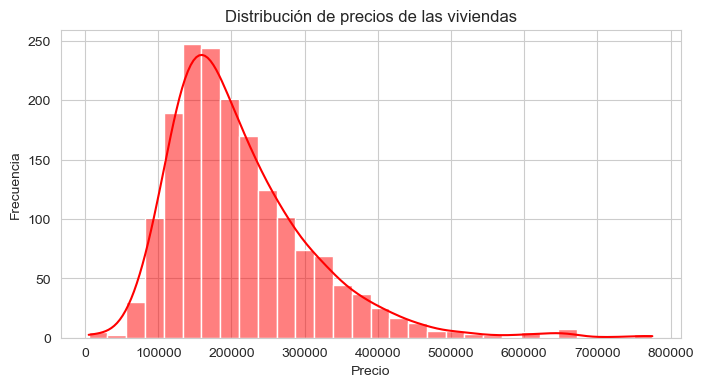

In [631]:
plt.figure(figsize=(8, 4))
sns.histplot(dataset['price'], kde=True, bins=30, color='red')
plt.title('Distribución de precios de las viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<font size="4">

#### Análisis de las variables numéricas

En este apartado procederemos a analizar las variables númericas para hacernos la idea de cómo es la distribución que siguen estos datos. Para ello, utilizaremos gráficas de densidad debido a que al ser variables numéricas, la posibilidad de valores es infinita.

Tras poder visualizar las gráficas de distribución de cada una de las variables cuantitativas, se ha decidido que las siguientes columnas van a tratarse como variables cualitativas y, por consiguiente, vamos a realizar agrupaciones de los valores de estas, debido a que los resultado están muy desequilibrados:
- bedrooms
- fireplaces

Es por ello, que vamos a convertirlas a tipo string (código debajo de las gráficas)

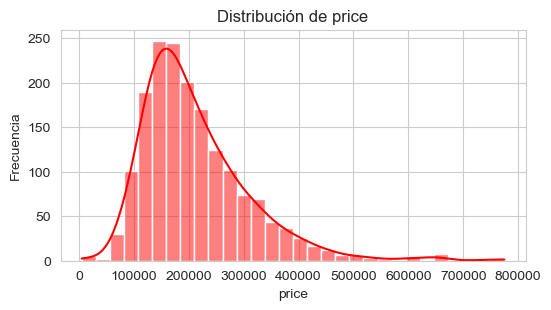

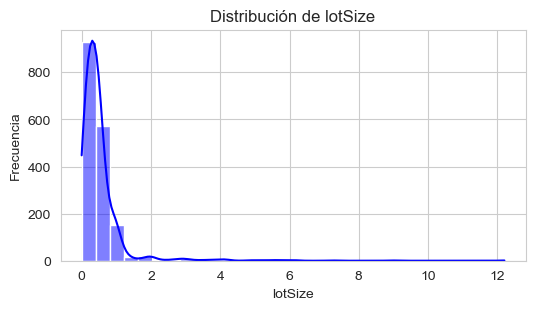

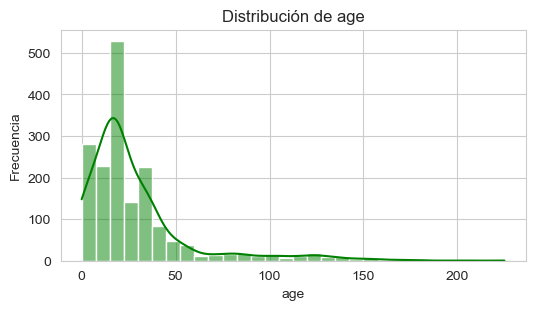

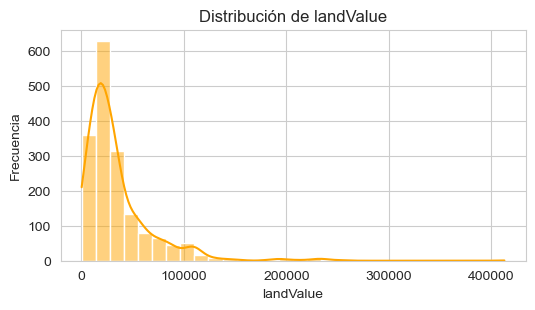

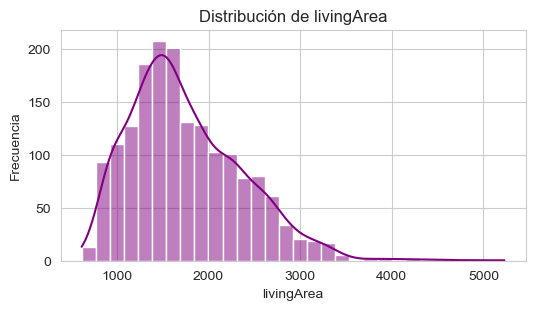

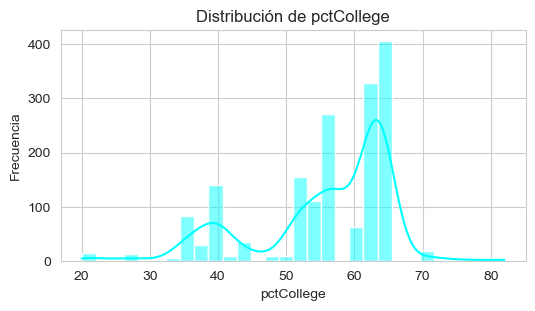

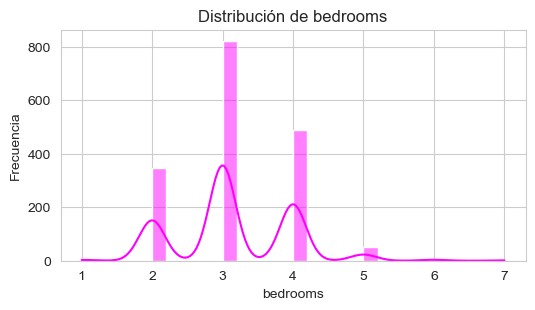

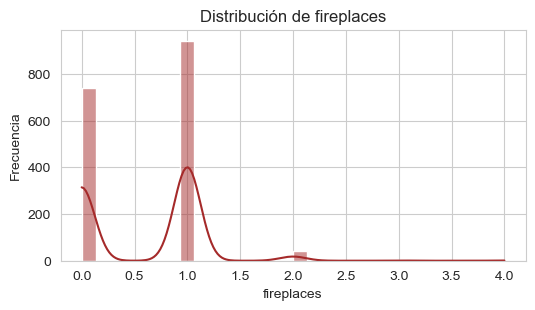

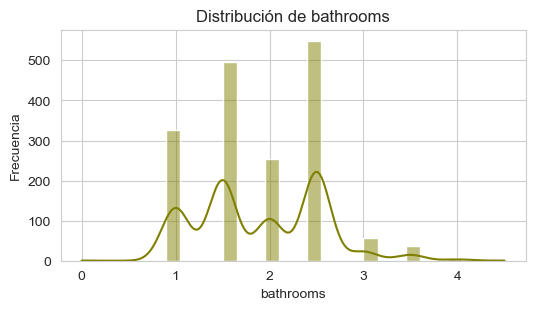

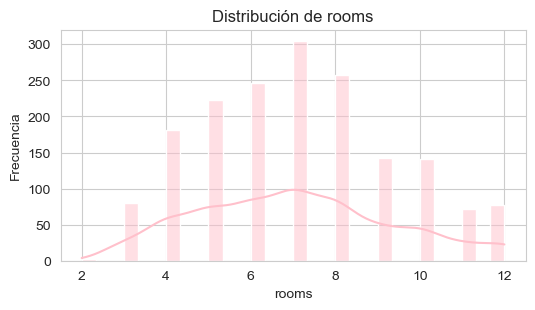

In [632]:
lista_columnas = dataset.select_dtypes(include=['int64', 'float64']).columns
colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'olive', 'pink']

for i, columna in enumerate(lista_columnas):
    plt.figure(figsize=(6, 3))
    color = colores[i % len(colores)]  # Para evitar errores si hay más columnas que colore
    sns.histplot(dataset[columna], kde=True, bins=30, color= color)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

In [633]:
dataset["bathrooms"]

0       1.0
1       2.5
2       1.0
3       1.5
4       1.0
       ... 
1723    2.5
1724    2.5
1725    1.0
1726    1.0
1727    1.0
Name: bathrooms, Length: 1728, dtype: float64

In [634]:
# convertimos a string las variables cuantitativas que pasamos a cualitativas
dataset.fireplaces = dataset.fireplaces.astype('str')
dataset.bedrooms = dataset.bedrooms.astype('str')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   object 
 7   fireplaces       1728 non-null   object 
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(6), object(8)
memory usage: 216.1+ KB


In [635]:
dataset.select_dtypes(include=['int64', 'float64']).describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,4.500000,12.000000


<font size="4">

Procedemos analizar la correlación de todas las variables entre si, para ello, seguiremos el esquema de esta tabla:

| Tipo de correlación                                    | Impacto en regresión lineal                           | Solución recomendada                      |
| ----------------------------------------------------- | ---------------------------------------------------- | --------------------------------------- |
| Alta correlación entre predictores (multicolinealidad) | Coeficientes inestables, dificultad de interpretación | Eliminar variables, regularización, PCA |
| Baja o nula correlación con variable objetivo          | Variable poco útil, agrega ruido                      | Eliminar variable o revisar su relevancia |
| Correlación moderada a alta con variable objetivo      | Útil para predecir                                    | Mantener en el modelo                    |

En el código de a continuación, se genera la matriz de correlación utilizando un mapa de calor. En él, podemos ver como de relacionadas están las variables entre sí. Valores cercanos a 1 y a -1 significa que esas dos variables están muy relacionadas entre sí, en cambio, valores cercanos a 0, significa que las variables no están relacionadas entre sí, lo cual puede ser positivo o no, dependiendo de si las dos variables son predictoras o, una predictora y la otra objetivo.



               price   lotSize       age  landValue  livingArea  pctCollege  \
price       1.000000  0.158333 -0.188793   0.581266    0.712390    0.200119   
lotSize     0.158333  1.000000 -0.016352   0.059222    0.163450   -0.033148   
age        -0.188793 -0.016352  1.000000  -0.021818   -0.174242   -0.037785   
landValue   0.581266  0.059222 -0.021818   1.000000    0.423441    0.228427   
livingArea  0.712390  0.163450 -0.174242   0.423441    1.000000    0.209981   
pctCollege  0.200119 -0.033148 -0.037785   0.228427    0.209981    1.000000   
bathrooms   0.597250  0.084823 -0.361897   0.297498    0.718564    0.179541   
rooms       0.531170  0.137604 -0.082264   0.298865    0.733666    0.157068   

            bathrooms     rooms  
price        0.597250  0.531170  
lotSize      0.084823  0.137604  
age         -0.361897 -0.082264  
landValue    0.297498  0.298865  
livingArea   0.718564  0.733666  
pctCollege   0.179541  0.157068  
bathrooms    1.000000  0.517585  
rooms        0.5

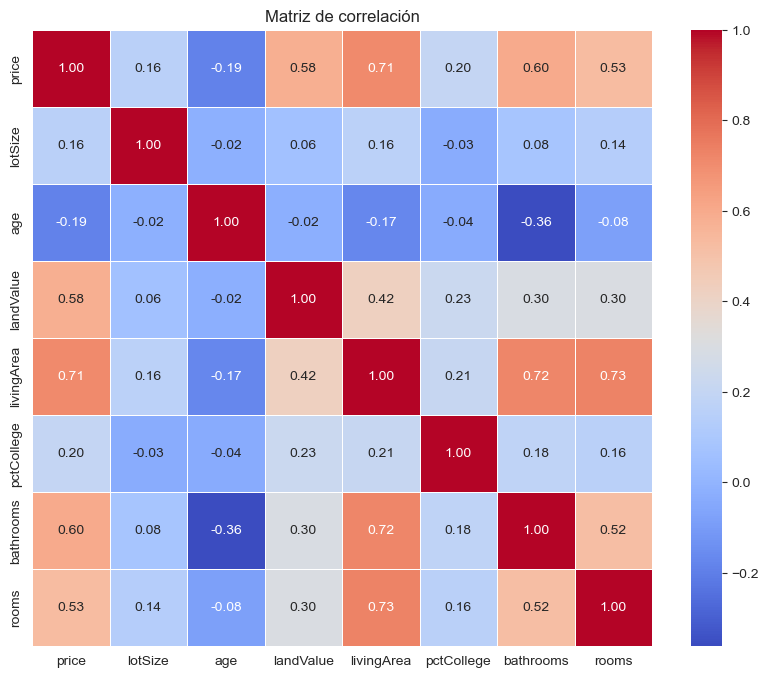

In [636]:
import matplotlib.pyplot as plt
# calculamos la matriz de correlación

dataset_num = dataset.select_dtypes(include=['int64', 'float64'])
corr_matrix = dataset_num.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

<font size="4">

Tras analizar la correlación entre las variables. Procedemos a mantener todas las variables aunque, podríamos eliminar:
- livingArea: por su alta correlación con las variables rooms y bathrooms.
- lotSize, age y bathrooms: por su baja correlación con respecto a la variable objetivo.
<br>
<br>
<br>
#### Análisis de las variables cualitativas

Para el análisis de las variables cualitativas, vamos a proceder, primeramente a graficar cada una de ella con la finalidad de observar como se distribuyen los datos (cuanta cantidad de cada opción hay en cada variable).

Analizando las gráficas de densidad de las variables cualitativas nos damos cuenta que hay valores en ciertas variables los cuales están muy por debajo del resto de esa misma variable, es por ello que vamos a agruparlos. Las agrupaciones que vamos a realizar son las siguientes:
- bedrooms: los valores que tendrá son [1, 2, 3, 4, 5 o más]
- fireplaces: los valores que tendrá son [0, 1, 2 o más]

In [637]:
dataset.select_dtypes(include=["object"]).describe()

,bedrooms,fireplaces,heating,fuel,sewer,waterfront,newConstruction,centralAir
count,1728,1728,1728,1728,1728,1728,1728,1728
unique,7,5,3,3,3,2,2,2
top,3,1,hot air,gas,public/commercial,No,No,No
freq,822,942,1121,1197,1213,1713,1647,1093


bedrooms
1      7
2    348
3    822
4    487
5     53
6      8
7      3
Name: count, dtype: int64
******************************
fireplaces
0    740
1    942
2     42
3      2
4      2
Name: count, dtype: int64
******************************
heating
electric            305
hot air            1121
hot water/steam     302
Name: count, dtype: int64
******************************
fuel
electric     315
gas         1197
oil          216
Name: count, dtype: int64
******************************
sewer
none                   12
public/commercial    1213
septic                503
Name: count, dtype: int64
******************************
waterfront
No     1713
Yes      15
Name: count, dtype: int64
******************************
newConstruction
No     1647
Yes      81
Name: count, dtype: int64
******************************
centralAir
No     1093
Yes     635
Name: count, dtype: int64
******************************


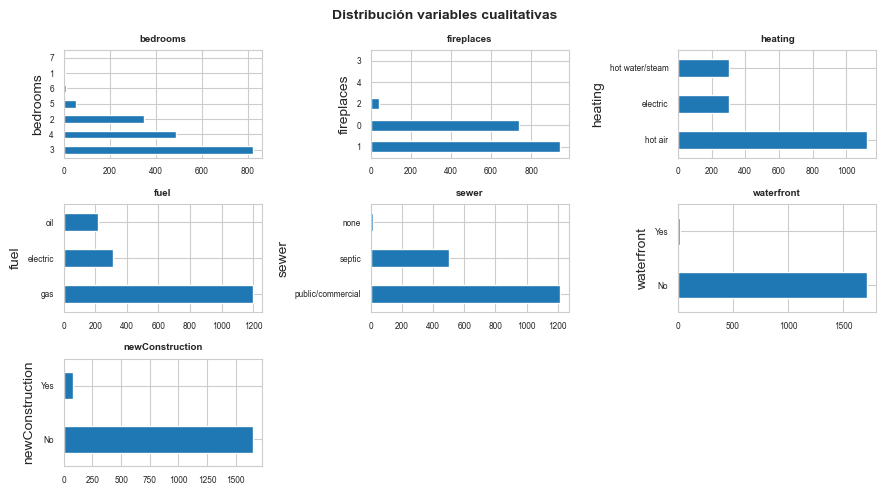

In [638]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    dataset[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold")

# calculamos densidad de valores de cada variable
for columna in dataset.select_dtypes(include=['object']).columns:
    print(f"{dataset[columna].value_counts().sort_index()}")
    print("*"*30)

<font size="4">

Procedemos a agrupar los valores que hemos mencionado anteriormente:


In [639]:
# agrupamos valores columna bedrooms
mapa_bedrooms = {
    "1" : "1",
    "2" : "2",
    "3" : "3",
    "4" : "4",
    "5" : ">5",
    "6" : ">5",
    "7" : ">5",
}

dataset['bedrooms'] = dataset['bedrooms'].map(mapa_bedrooms)
dataset['bedrooms'].unique().tolist()

['2', '3', '4', '>5', '1']

In [640]:
# agrupamos valores columna fireplace
mapa_fireplaces = {
    "0" : "0",
    "1" : "1",
    "2" : ">2",
    "3" : ">2",
    "4" : ">2"
}

dataset["fireplaces"] = dataset["fireplaces"].map(mapa_fireplaces)
dataset["fireplaces"].unique().tolist()

['1', '0', '>2']

<font size="4">

Una vez realizado todo el análisis exploratorio de los datos sobre las variables cuantitativas y cualitativas, vamos a proceder a representar como están distribuidos los datos de cada una de las variables cualitativas con respecto a la variable objetivo (precio).

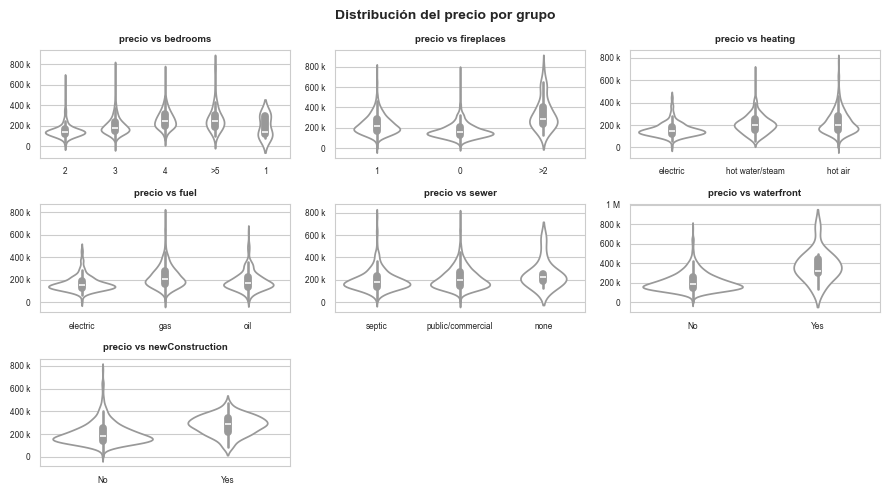

In [641]:
from matplotlib import ticker

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'price',
        data  = dataset,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

<font size="4">

# Preprocesamiento de los datos

Hasta este punto, hemos extraído gran cantidad de información del dataset y, ahora a continuación, vamos a preparar los datos para que el modelo los coja como está diseñado, es decir, vamos a realizar el preprocesamiento de los datos. 

Primero, dividiremos el dataset en conjunto train y conjunto test. Después procederemos a realizar el preprocesamiento de las variables. Para ello, aplicaremos varios métodos:
- variables cuantitativas: utilizaremos un standar_scaler para que los valores estén normalizados con media=0 y desviación=1
- variables cualitativas: dependiendo del caso, utilizaremos OneHotEncoding o LabelEncoding

Para realizar el preprocesamiento usaremos la funcion ColumnTransformer para hacer las transformaciones en paralelo

In [642]:
# Division del dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(
    dataset.drop("price", axis="columns"),
    dataset["price"],
    test_size=0.3,
    random_state=42
)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1209, 15) (1209,) (519, 15) (519,)


In [643]:
col_cualitativas = x_train.select_dtypes(include=["object"]).columns.tolist()
col_cuantitativas = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()


# Diseñamos el preprocesador
preprocesador = ColumnTransformer(
                   [('scale', StandardScaler(), col_cuantitativas),
                    ('onehot', OneHotEncoder(drop="first",handle_unknown='ignore', sparse_output=False), col_cualitativas)],
                remainder = 'passthrough',
                verbose_feature_names_out = False
               ).set_output(transform="pandas")

In [644]:
from sklearn import set_config
set_config(display='diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['lotSize', 'age', 'landValue', 'livingArea',
                                  'pctCollege', 'bathrooms', 'rooms']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['bedrooms', 'fireplaces', 'heating', 'fuel',
                                  'sewer', 'waterfront', 'newConstruction',
                                  'centralAir'])],
                  verbose_feature_names_out=False)

<font size="4">

# Creamos modelo, entrenamos y calculamos métricas

En este bloque vamos a definir un modelo de caja negra al cual le aplicaremos métodos agnósticos para entender las decisiones del modelo.

Un **modelo de caja negra** en machine learning es un tipo de modelo cuyo funcionamiento interno es complejo o inaccesible para el usuario, lo que hace difícil entender **cómo** toma sus decisiones. Aunque estos modelos, como las **redes neuronales profundas**, los **Random Forest** o los **modelos de boosting**, suelen ofrecer un rendimiento muy alto, no permiten ver fácilmente qué variables están influyendo y en qué medida. Solo se puede observar su comportamiento a través de las entradas (datos) y salidas (predicciones), sin saber con claridad qué ocurre dentro. Por eso se les llama "cajas negras": porque **sabemos qué entra y qué sale, pero no qué pasa dentro**. En nuestro caso usaremos un **algoritmo de Random Forest**.

Los **métodos agnósticos** de interpretabilidad son técnicas que explican el comportamiento de modelos complejos sin necesidad de conocer su estructura interna. Se basan únicamente en las entradas y salidas del modelo, por lo que pueden aplicarse a cualquier tipo (redes neuronales, Random Forest, etc.). Entre los más comunes están **LIME**, que genera explicaciones locales simples de predicciones individuales; **SHAP**, que asigna a cada variable una contribución justa a la predicción; **Permutation Importance**, que mide la importancia de una variable observando cómo afecta al rendimiento al desordenarla; y los gráficos **PDP** e **ICE**, que muestran cómo una o varias variables influyen en las predicciones del modelo.

In [645]:
# vemos tamaño del dataset de train y test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1209, 15), (519, 15), (1209,), (519,))

In [646]:
# definimos el modelo 
modelo_RF = RandomForestRegressor(n_estimators = 100, random_state = 42)

# creamos el pipeline
pipeline = Pipeline(steps= [
    ('preprocessor', preprocesador),
    ('model', modelo_RF)
])

# entrenamos el modelo
pipeline.fit(x_train, y_train)

# predecimos modelo
y_pred = pipeline.predict(x_test)

In [647]:
# Evaluar con métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²     : {r2:.4f}")
print(f"MAE    : {mae:.2f}")
print(f"RMSE   : {rmse:.2f}")

R²     : 0.6512
MAE    : 41042.47
RMSE   : 62800.88


<font size="4">

Para la explicabilidad del problema, usaremos **Permutation Importance** que es un método agnóstico ampliamente utilizado para evaluar la importancia de las variables en un modelo predictivo, sin necesidad de conocer ni modificar su estructura interna. Es especialmente útil para modelos complejos como Random Forest, XGBoost o redes neuronales, ya que se puede aplicar independientemente del algoritmo utilizado. Su funcionamiento se basa en una idea simple pero poderosa: medir cuánto disminuye el rendimiento del modelo (por ejemplo, el R² en regresión o la precisión en clasificación) cuando se desordenan aleatoriamente los valores de una variable específica. Si una variable es relevante para el modelo, al romper su relación con el objetivo mediante esta permutación, el rendimiento del modelo se verá afectado notablemente. En cambio, si la variable no tiene un rol importante, el impacto será mínimo. Este procedimiento se repite varias veces para obtener una media y una desviación estándar, lo que permite tener una estimación robusta de la importancia de cada variable. En resumen, Permutation Importance permite entender qué variables influyen más en las predicciones del modelo de manera transparente, cuantificable y sin comprometer su funcionamiento interno.

De esta manera, a modo de resumen, las acciones que debemos realizar con este modelo agnóstico, se muestran en la siguiente tabla:

- Valores grandes positivos → esa variable es muy útil para el modelo.
- Valores cercanos a 0 → esa variable da igual.
- Valores negativos → esa variable puede estar confundiendo al modelo. Por lo tanto, podemos eliminarla.


In [648]:
x_train.head()

,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1178,0.87,0,108900,3259,40,4,1,2.5,10,hot air,gas,public/commercial,No,Yes,No
585,0.07,0,48200,2242,57,3,0,2.5,6,hot air,gas,public/commercial,No,No,Yes
1552,0.70,16,35000,2803,64,4,1,3.0,10,hot water/steam,gas,public/commercial,No,No,Yes
1169,0.99,1,5000,2660,62,4,1,3.5,8,hot air,gas,public/commercial,No,No,Yes
1033,0.46,17,60500,2762,63,4,1,2.5,8,hot water/steam,gas,public/commercial,No,No,Yes


In [649]:
# Transformar el conjunto de entrenamiento
X_train_transformed = pipeline.named_steps['preprocessor'].fit_transform(x_train)

# Transformar el conjunto de prueba
X_test_transformed = pipeline.named_steps['preprocessor'].transform(x_test)

X_train_transformed.head()

,lotSize,age,landValue,livingArea,pctCollege,bathrooms,rooms,bedrooms_2,bedrooms_3,bedrooms_4,...,fireplaces_>2,heating_hot air,heating_hot water/steam,fuel_gas,fuel_oil,sewer_public/commercial,sewer_septic,waterfront_Yes,newConstruction_Yes,centralAir_Yes
1178,0.464333,-0.943798,2.261772,2.406663,-1.503059,0.896619,1.270765,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
585,-0.599111,-0.943798,0.431582,0.778724,0.135794,0.896619,-0.452089,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1552,0.238351,-0.411420,0.033584,1.676731,0.810615,1.647320,1.270765,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1169,0.623850,-0.910524,-0.870958,1.447827,0.617809,2.398021,0.409338,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1033,-0.080682,-0.378147,0.802444,1.611101,0.714212,0.896619,0.409338,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [650]:
from sklearn.inspection import permutation_importance

# Calcular importancia por permutación sobre test
result = permutation_importance(
    estimator=modelo_RF,
    X=X_test_transformed,
    y=y_test,
    n_repeats=10,
    random_state=42,
    scoring='r2'  
)

In [651]:
# Mostrar resultados
importancia_df = pd.DataFrame({
    'feature': X_test_transformed.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

print(importancia_df)

                    feature  importance_mean  importance_std
3                livingArea         0.428534        0.032759
2                 landValue         0.238859        0.018462
1                       age         0.030802        0.005717
4                pctCollege         0.022931        0.005678
0                   lotSize         0.015413        0.006139
5                 bathrooms         0.010439        0.004118
19           waterfront_Yes         0.007607        0.001843
21           centralAir_Yes         0.005425        0.002107
6                     rooms         0.003666        0.002440
16                 fuel_oil         0.003326        0.003613
20      newConstruction_Yes         0.002661        0.001008
11             fireplaces_1         0.001753        0.000738
18             sewer_septic         0.001557        0.001038
7                bedrooms_2         0.001443        0.001081
15                 fuel_gas         0.001330        0.000872
14  heating_hot water/st

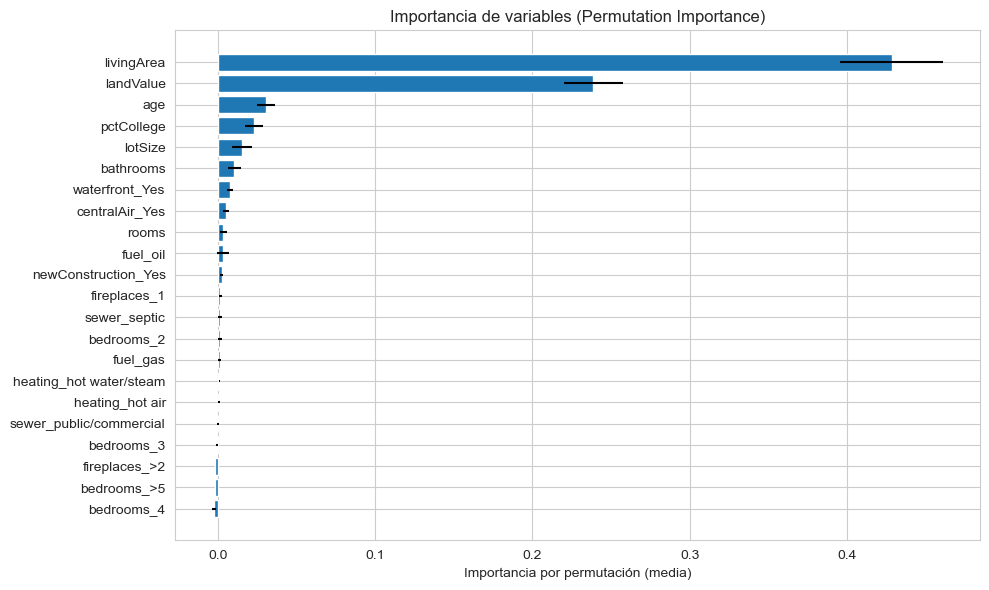

In [652]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['feature'], importancia_df['importance_mean'], xerr=importancia_df['importance_std'])
plt.xlabel('Importancia por permutación (media)')
plt.title('Importancia de variables (Permutation Importance)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<font size="4">

Para este caso, vamos a proceder a eliminar dichas variables negativas y, volveremos a entrenar el modelo de nuevo y a calcular sus métricas. Las variables que eliminaremos serán las siguientes:
- bedrooms_4
- bedrooms_>5
- fireplaces_>2
- bedrooms_3

In [653]:
X_train_transformed = X_train_transformed.drop(columns=["bedrooms_4", "bedrooms_>5", "fireplaces_>2", "bedrooms_3"], axis=1)
X_test_transformed = X_test_transformed.drop(columns=["bedrooms_4", "bedrooms_>5", "fireplaces_>2", "bedrooms_3"], axis=1)

X_train_transformed.head()

,lotSize,age,landValue,livingArea,pctCollege,bathrooms,rooms,bedrooms_2,fireplaces_1,heating_hot air,heating_hot water/steam,fuel_gas,fuel_oil,sewer_public/commercial,sewer_septic,waterfront_Yes,newConstruction_Yes,centralAir_Yes
1178,0.464333,-0.943798,2.261772,2.406663,-1.503059,0.896619,1.270765,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
585,-0.599111,-0.943798,0.431582,0.778724,0.135794,0.896619,-0.452089,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1552,0.238351,-0.411420,0.033584,1.676731,0.810615,1.647320,1.270765,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1169,0.623850,-0.910524,-0.870958,1.447827,0.617809,2.398021,0.409338,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1033,-0.080682,-0.378147,0.802444,1.611101,0.714212,0.896619,0.409338,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [654]:
# creamos modelo con mismas caracteristicas
modelo_RF2 = RandomForestRegressor(n_estimators = 100, random_state = 42)

# entrenamos modelo
modelo_RF2.fit(X_train_transformed, y_train)

# predecimos modelo
y_pred_2 = modelo_RF2.predict(X_test_transformed)

In [655]:
# Evaluar con métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_2)
mae = mean_absolute_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)
rmse = np.sqrt(mse)

print(f"R²     : {r2:.4f}")
print(f"MAE    : {mae:.2f}")
print(f"RMSE   : {rmse:.2f}")

R²     : 0.6586
MAE    : 40775.84
RMSE   : 62123.94


<font size="4">

Podemos observar que el modelo ha mejorado ligeramente. Volvemos a aplicar el modelo agnóstico utilizado anteriormente.

In [656]:
# Calcular importancia por permutación sobre test
result = permutation_importance(
    estimator=modelo_RF2,
    X=X_test_transformed,
    y=y_test,
    n_repeats=10,
    random_state=42,
    scoring='r2'  
)

In [657]:
# Mostrar resultados
importancia_df = pd.DataFrame({
    'feature': X_test_transformed.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

print(importancia_df)

                    feature  importance_mean  importance_std
3                livingArea         0.427367        0.033766
2                 landValue         0.247498        0.018896
1                       age         0.029448        0.005711
4                pctCollege         0.022560        0.005588
0                   lotSize         0.015438        0.007473
5                 bathrooms         0.011671        0.004239
6                     rooms         0.008621        0.002774
15           waterfront_Yes         0.007553        0.002104
17           centralAir_Yes         0.005462        0.002480
12                 fuel_oil         0.003551        0.003869
16      newConstruction_Yes         0.002597        0.001137
7                bedrooms_2         0.001890        0.000854
8              fireplaces_1         0.000986        0.000838
11                 fuel_gas         0.000866        0.000636
14             sewer_septic         0.000662        0.000972
9           heating_hot 

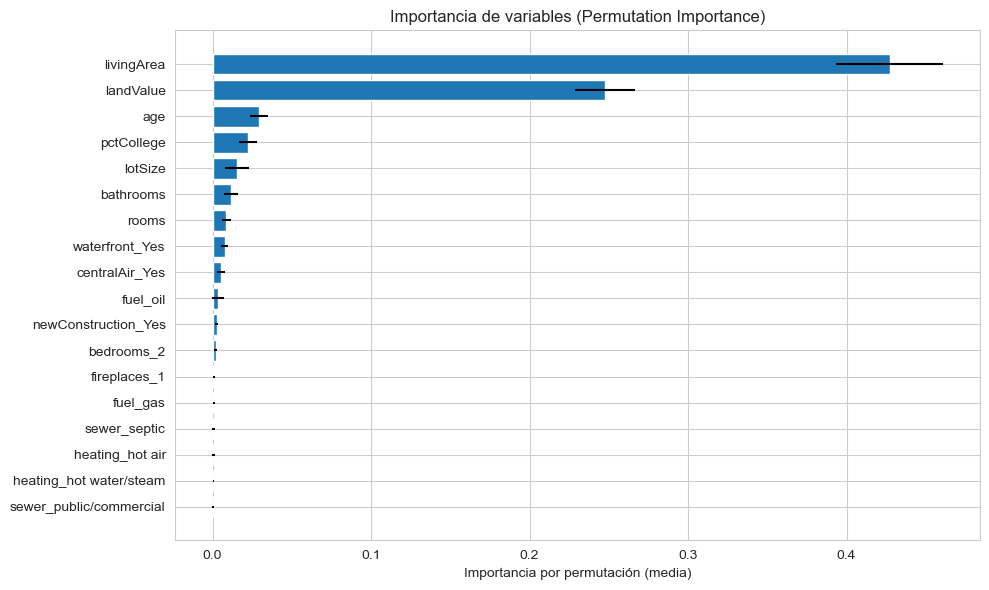

In [658]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['feature'], importancia_df['importance_mean'], xerr=importancia_df['importance_std'])
plt.xlabel('Importancia por permutación (media)')
plt.title('Importancia de variables (Permutation Importance)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<font size="4">

### Valoración del modelo Random Forest con Permutation Importance

El modelo Random Forest que has evaluado presenta un buen desempeño general con un **R² = 0.6586**, lo que indica que explica aproximadamente el **65.9% de la variabilidad** en el precio de las casas. Esto es un resultado sólido para problemas de regresión en datos del mundo real, especialmente en predicción inmobiliaria donde existen muchas variables latentes difíciles de capturar.

Las métricas de error:

* **MAE = 40,775.84**: El error medio absoluto indica que, en promedio, la predicción se desvía en unos 40,776 dólares del precio real, lo cual es razonable para muchos mercados inmobiliarios.
* **RMSE = 62,123.94**: Este valor mayor que el MAE indica que hay algunos errores grandes, pero no extremos.

En cuanto a la importancia de variables obtenida mediante Permutation Importance, se observa que:

* **livingArea** y **landValue** son las características más influyentes, aportando más del 67% de la importancia total, lo cual es lógico porque el tamaño de la casa y el valor del terreno suelen ser los principales determinantes del precio.
* Variables demográficas o de estado de la propiedad como **age**, **pctCollege**, y condiciones de la casa (baños, habitaciones, aire acondicionado central, fuel\_oil, etc.) tienen menor, pero relevante influencia.
* Variables categóricas menos comunes (por ejemplo, tipos específicos de calefacción, estado del alcantarillado) tienen una contribución mínima, reflejando su menor impacto.

Esto indica que el modelo está capturando tanto efectos grandes (área y valor del terreno) como efectos secundarios, lo que le da un buen balance y explicabilidad.


### Comparación con modelos explicables de la otra práctica (Regresión Lineal, KNN, Árbol de Decisión)

* **Random Forest**: Mejora el R² al 0.6586 frente al 0.6355 de la regresión lineal, y disminuye MAE y RMSE (40,776 vs 43,942 y 62,124 vs 64,196 respectivamente), mostrando mayor capacidad para captar relaciones no lineales y complejas entre variables. Además, el método de Permutation Importance facilita interpretar la importancia de cada variable, algo que a veces puede ser más difícil en modelos más complejos.

* **Regresión Lineal**: Buen desempeño general, con buena interpretabilidad, pero limitado para relaciones no lineales o interacciones complejas. Sus errores son algo mayores y explica un poco menos de varianza.

* **KNN**: Captura relaciones no lineales, pero su desempeño es inferior al de Random Forest y regresión lineal en este caso, con R² = 0.5920 y errores más altos, lo que indica que probablemente no logra generalizar tan bien o que el dataset no favorece mucho este tipo de modelo.

* **Árbol de Decisión**: Peor desempeño, con R² = 0.5598 y errores más altos, posiblemente por sobreajuste o falta de optimización.


### Conclusión

El modelo Random Forest con Permutation Importance ofrece un **mejor equilibrio entre precisión y explicabilidad** que los modelos clásicos aquí comparados, con métricas superiores y una clara indicación de qué variables afectan más la predicción. Si bien la regresión lineal es más simple e interpretable, pierde algo de precisión, y otros modelos no logran igualar su rendimiento.
